# KMeans Clustering (Core)
- David Atkins

#### Data Prep

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn import set_config
set_config(transform_output='pandas')

import warnings
warnings.filterwarnings("ignore")

In [40]:
df = pd.read_csv('data/cust_seg.csv', index_col = 'Customer Id')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 66.4 KB


,Unnamed: 0,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,,
1,0,41,2,6,19,0.124,1.073,0.0,6.3
2,1,47,1,26,100,4.582,8.218,0.0,12.8
3,2,33,2,10,57,6.111,5.802,1.0,20.9
4,3,29,2,4,19,0.681,0.516,0.0,6.3
5,4,47,1,31,253,9.308,8.908,0.0,7.2


In [41]:
df = df.drop(columns=['Unnamed: 0'])
df.head(3)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9


In [42]:
df.isna().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [43]:
df = df.dropna()
df.isna().sum().sum()

0

In [44]:
df.duplicated().sum()

0

#### Using KMeans to create segments

In [45]:
# Scaling Data
x_scaled = StandardScaler().fit_transform(df)
x_scaled

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,0.768304,0.298793,-0.359007,-0.723102,-0.675699,-0.604284,-0.594950,-0.580528
2,1.519090,-0.779325,2.647029,1.478707,1.431421,1.570620,-0.594950,0.372222
3,-0.232744,0.298793,0.242201,0.309845,2.154119,0.835201,1.680814,1.559495
4,-0.733267,0.298793,-0.659610,-0.723102,-0.412427,-0.773833,-0.594950,-0.580528
5,1.519090,-0.779325,3.398538,5.637681,3.665215,1.780653,-0.594950,-0.448609
...,...,...,...,...,...,...,...,...
845,0.768304,-0.779325,-0.208705,-0.070714,-0.406283,-0.566235,-0.594950,-0.859025
847,-0.858398,0.298793,-0.208705,-0.315360,-0.564624,-0.315718,-0.594950,-0.477925
848,-1.233791,2.455029,-1.260817,-0.750285,0.590086,0.046209,1.680814,3.391707


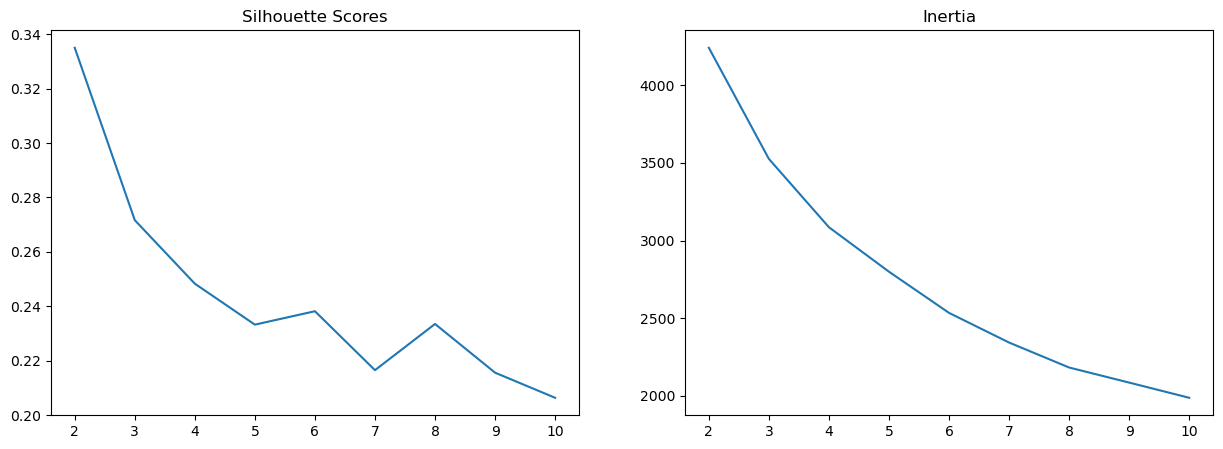

In [46]:
ks = range(2, 11)

inertias = []
sils = []

for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(x_scaled)
  inertias.append(model.inertia_)
  sils.append(silhouette_score(x_scaled, model.labels_))

fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

In [50]:
# Refit KMeans with 4 clusters
kmeans = KMeans(n_clusters=3, n_init= 'auto', random_state=42)
kmeans.fit(x_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,1
2,47,1,26,100,4.582,8.218,0.0,12.8,0
3,33,2,10,57,6.111,5.802,1.0,20.9,2
4,29,2,4,19,0.681,0.516,0.0,6.3,1
5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [51]:
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,42.117647,1.593583,15.620321,70.957219,1.736540,3.701182,0.042781,8.264706
1,1,30.871359,1.674757,4.725728,28.507282,0.724454,1.583913,0.264563,8.564563
2,2,37.693069,2.158416,9.940594,68.386139,4.596911,7.881624,0.653465,20.874257


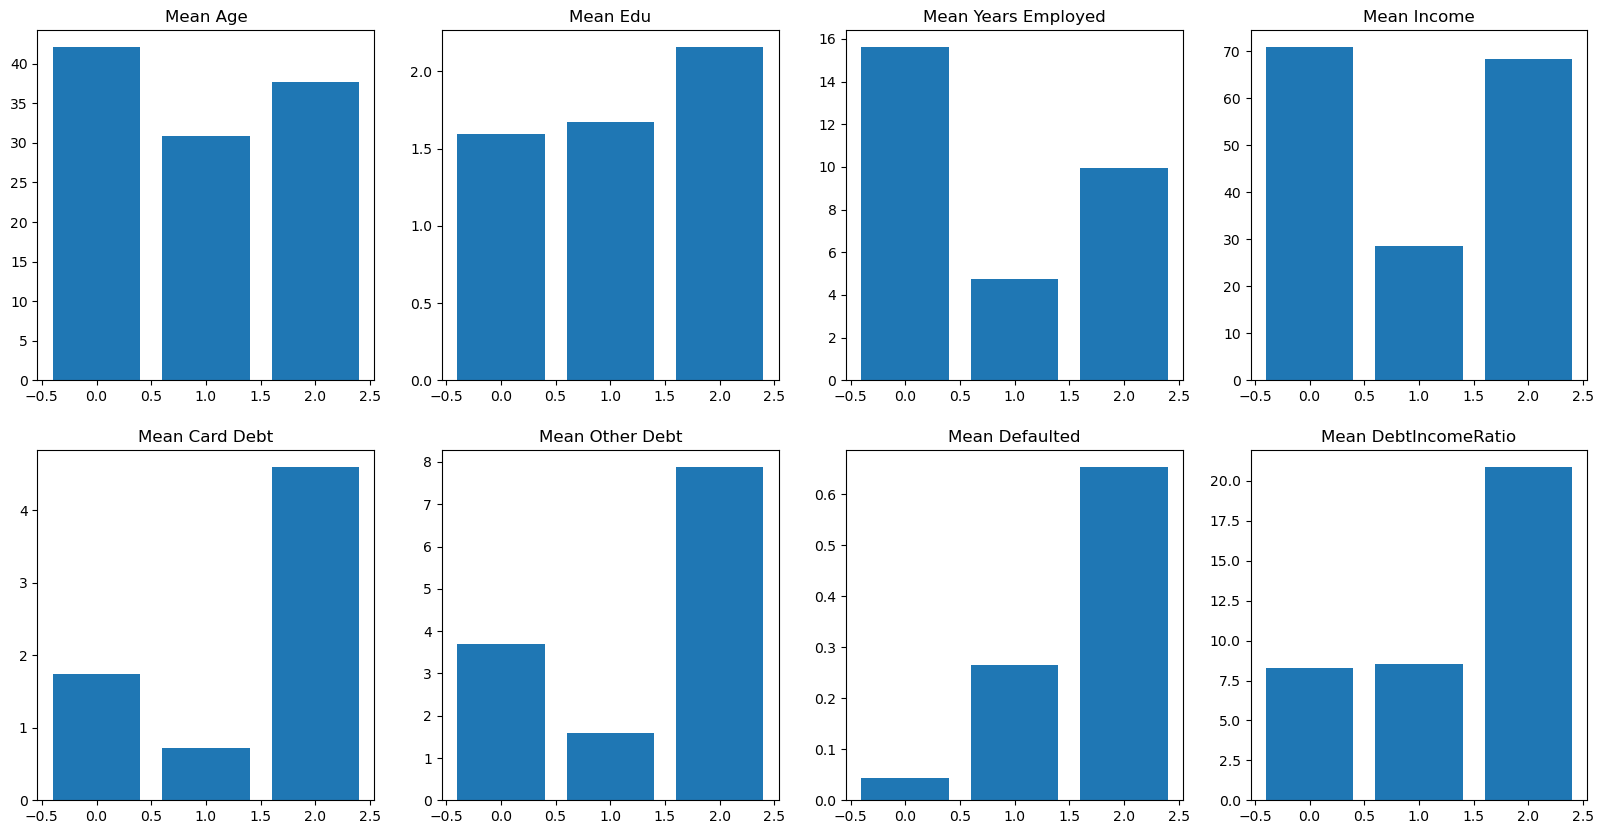

In [52]:
# Visualize means 
fig, axes = plt.subplots(2,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

#### Clusters
- **Cluster 0**

Generally over 40 with over 15 years of employment and an upper 5 figure income. Being solidly employed for a long period they have the lowest mean debt to income ratio.


- **Cluster 1**

This group is younger, around age 30. The have the lowest average income at ~30k, and on average have been employed ~5 years. They have a very similar dept to income ratio as Cluster 0.


- **Cluster 2**

This group is in their upper 30s, with ~10 years employed. I am roughly in this group. Their average income is ~70k, but they have by far the highest debt to income ratio. 
